In [2]:
import numpy as np
import math
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#### Question 1 
Use secant method to find a solution in $[0.1, 1]$ accurate to within $10^{-4}$ for $600x^4 - 550x^3 + 200x^2 - 20x - 1 = 0$.

In [5]:
def h(x):
    return 600*(x**4) - 550*(x**3) + 200*(x**2) - 20*x -1
 
def secant(h,p0,p1,tol):
    hp0 = h(p0)
    hp1 = h(p1)
    n=2
    print(f"{'n':^5}|{'p0':^10}|{'p1':^10}|{'pn':^10}|{'h(pn)':^10}")
    while abs(hp1) > tol:
        p = p1 - (hp1*(p1- p0)) / (hp1 - hp0)
        hp = h(p)
        print(f"{n:<5}|{p0:>10f}|{p1:>10f}|{p:>10f}|{hp:>10f}")
        p0 = p1
        p1 = p
        hp0 = hp1
        hp1 = h(p1)
        n += 1
    return p

p0 = 0.1
p1 = 1
 
tol = 1e-4
root = secant(h, p0, p1,tol)
print(f"\nRoot: {root:.6f}")

  n  |    p0    |    p1    |    pn    |  h(pn)   
2    |  0.100000|  1.000000|  0.105818| -1.453331
3    |  1.000000|  0.105818|  0.111457| -1.413539
4    |  0.105818|  0.111457|  0.311777|  1.206282
5    |  0.111457|  0.311777|  0.219541| -0.177148
6    |  0.311777|  0.219541|  0.231352| -0.013972
7    |  0.219541|  0.231352|  0.232363|  0.000142
8    |  0.231352|  0.232363|  0.232353| -0.000000

Root: 0.232353


#### Question 2

COnstruct a clamped cubic spline for the following data
| x  | f(x)       | f'(x)      |
|:---| ----------:| ----------:|
|-1   | 0.86199480 | 0.15536240 |  
|-0.5 | 0.95802009 | 0.23269654 |  
|0    | 1.0986123  | 0.33333333 |  
|0.5  | 1.2943767  | 0.45186776 |


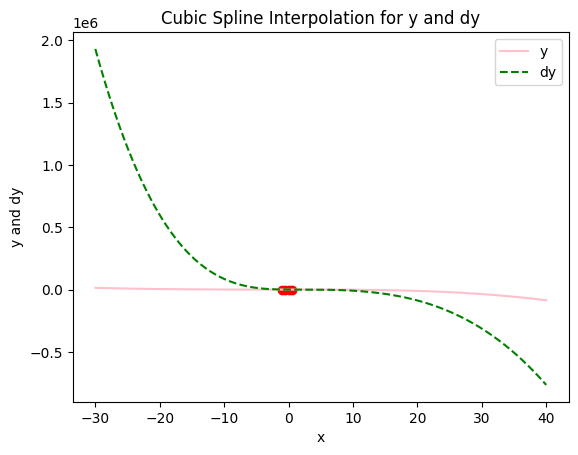

In [119]:
x =[-1, -0.5, 0, 0.5]
y = [0.86199480, 0.95802009, 1.0986123, 1.2943767]
dy = [0.15536240, 0.23269654, 0.33333333, 0.45186776]

x_new = np.linspace(-30, 40, 1000)

cs = CubicSpline(x, y, bc_type="clamped")
y_new = cs(x_new)

cs2 = CubicSpline(y, dy, bc_type="clamped")
dy_new = cs2(x_new)

plt.plot(x, y, 'o', color='red')
plt.plot(x_new, y_new, label='y', color='pink')
plt.plot(x_new, dy_new, label='dy', color='green', linestyle="--")

plt.title("Cubic Spline Interpolation for y and dy")
plt.xlabel("x")
plt.ylabel("y and dy")
plt.legend()

plt.show()


#### Question 3
The upper portion of this noble beast is to be approximated using clamped cubic spline interpolants.

The curve is drawn on a grid from which the table is constructed. Use algorithm to construct the three clamped cubic splines.

Graph the derived piecewise function approximating the curve.

<img src = "question-3.png" width = 700>
<!-- ![](question-3.png) -->

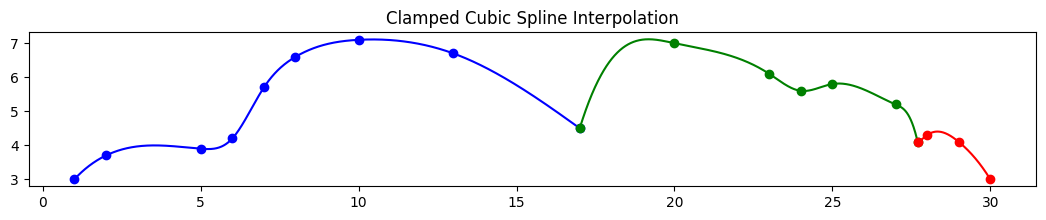

In [118]:
x1 = [1, 2, 5, 6, 7, 8, 10, 13, 17]
y1 = [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
dy1 = [1, -0.67]

x2 = [17, 20, 23, 24, 25, 27, 27.7]
y2 = [4.5, 7, 6.1, 5.6, 5.8, 5.2, 4.1]
dy2 = [3, -4]

x3 = [27.7, 28, 29, 30]
y3 = [4.1, 4.3, 4.1, 3]
dy3 = [0.33, -1.5]

x1_new = np.linspace(1, 17, 1000)
cs1 = CubicSpline(x1, y1, bc_type=((1, 1), (1, -0.67)))
y1_new = cs1(x1_new)

x2_new = np.linspace(17, 27.7, 1000)
cs2 = CubicSpline(x2, y2, bc_type=((1, 3), (1, -4)))
y2_new = cs2(x2_new)

x3_new = np.linspace(27.7, 30, 1000)
cs3 = CubicSpline(x3, y3, bc_type=((1, 0.33), (1, -1.5)))
y3_new = cs3(x3_new)

plt.figure(figsize=(13, 2))
plt.plot(x1, y1, 'o', color='blue')
plt.plot(x1_new, y1_new, label='Curve 1', color='blue')
plt.plot(x2, y2, 'o', color='green')
plt.plot(x2_new, y2_new, label='Curve 2', color='green')
plt.plot(x3, y3, 'o', color='red')
plt.plot(x3_new, y3_new, label='Curve 3', color='red')
plt.title("Clamped Cubic Spline Interpolation")
plt.show()
